In [3]:
from warnings import filterwarnings
filterwarnings('ignore')

Step1:Read Dataset


In [4]:
import pandas as pd
df=pd.read_csv('train.csv')
df.head()


,id,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,0,L50096,L,300.6,309.6,1596,36.1,140,0,0,0,0,0,0
1,1,M20343,M,302.6,312.1,1759,29.1,200,0,0,0,0,0,0
2,2,L49454,L,299.3,308.5,1805,26.5,25,0,0,0,0,0,0
3,3,L53355,L,301.0,310.9,1524,44.3,197,0,0,0,0,0,0
4,4,M24050,M,298.0,309.0,1641,35.4,34,0,0,0,0,0,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136429 entries, 0 to 136428
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       136429 non-null  int64  
 1   Product ID               136429 non-null  object 
 2   Type                     136429 non-null  object 
 3   Air temperature [K]      136429 non-null  float64
 4   Process temperature [K]  136429 non-null  float64
 5   Rotational speed [rpm]   136429 non-null  int64  
 6   Torque [Nm]              136429 non-null  float64
 7   Tool wear [min]          136429 non-null  int64  
 8   Machine failure          136429 non-null  int64  
 9   TWF                      136429 non-null  int64  
 10  HDF                      136429 non-null  int64  
 11  PWF                      136429 non-null  int64  
 12  OSF                      136429 non-null  int64  
 13  RNF                      136429 non-null  int64  
dtypes: f

In [6]:
df.isna().sum()

id                         0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Machine failure            0
TWF                        0
HDF                        0
PWF                        0
OSF                        0
RNF                        0
dtype: int64

In [7]:
df.duplicated().sum()

0

Step2:Seperate x and y

In [8]:
x=df.drop(columns=['id','Product ID','Type','Machine failure'])
y=df[['Machine failure']]

In [9]:
x.head()

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],TWF,HDF,PWF,OSF,RNF
0,300.6,309.6,1596,36.1,140,0,0,0,0,0
1,302.6,312.1,1759,29.1,200,0,0,0,0,0
2,299.3,308.5,1805,26.5,25,0,0,0,0,0
3,301.0,310.9,1524,44.3,197,0,0,0,0,0
4,298.0,309.0,1641,35.4,34,0,0,0,0,0


In [10]:
y.head()

,Machine failure
0,0
1,0
2,0
3,0
4,0


In [11]:
x_cat=list(x.columns[x.dtypes=='object'])
x_con=list(x.columns[x.dtypes!='object'])

In [12]:
x_cat

[]

In [13]:
x_con

['Air temperature [K]',
 'Process temperature [K]',
 'Rotational speed [rpm]',
 'Torque [Nm]',
 'Tool wear [min]',
 'TWF',
 'HDF',
 'PWF',
 'OSF',
 'RNF']

Step3:Preprossing

In [14]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.compose import ColumnTransformer

In [15]:
num_pipe=Pipeline(steps=[('impute',SimpleImputer(strategy='mean')),
                         ('scaler',StandardScaler())])

In [16]:
#cat_pipe=Pipeline(steps=[('impute',SimpleImputer(strategy='most_frequent')),
  #                       ('ohe',OneHotEncoder(handle_unknown='ignore',sparse_output=False))])

In [17]:
pre=ColumnTransformer([('num',num_pipe,x_con)]).set_output(transform='pandas')
                       

In [18]:
x_pre=pre.fit_transform(x)
x_pre.head()

,num__Air temperature [K],num__Process temperature [K],num__Rotational speed [rpm],num__Torque [Nm],num__Tool wear [min],num__TWF,num__HDF,num__PWF,num__OSF,num__RNF
0,0.395880,-0.246230,0.545416,-0.499711,0.556417,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568
1,1.469856,1.558605,1.720308,-1.323028,1.494433,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568
2,-0.302204,-1.040358,2.051873,-1.628831,-1.241447,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568
3,0.610675,0.692284,0.026445,0.464745,1.447532,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568
4,-1.000288,-0.679391,0.869773,-0.582043,-1.100744,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568


Step4:train test split

In [19]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x_pre,y,test_size=0.3,random_state=42)

In [20]:
xtrain.head()

,num__Air temperature [K],num__Process temperature [K],num__Rotational speed [rpm],num__Torque [Nm],num__Tool wear [min],num__TWF,num__HDF,num__PWF,num__OSF,num__RNF
58494,1.469856,0.331317,-0.744803,0.958735,1.478799,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568
75360,-0.516999,0.475704,-0.636684,0.229512,1.447532,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568
131485,-0.141107,-0.823778,-1.025912,0.241274,-0.741172,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568
45948,0.073688,0.403510,-0.024010,0.488269,-0.334698,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568
105004,0.181085,-0.101844,3.752944,-2.487432,0.650218,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568


In [21]:
ytrain.head()

,Machine failure
58494,0
75360,0
131485,0
45948,0
105004,0


In [22]:
xtest.head()

,num__Air temperature [K],num__Process temperature [K],num__Rotational speed [rpm],num__Torque [Nm],num__Tool wear [min],num__TWF,num__HDF,num__PWF,num__OSF,num__RNF
123128,0.556977,0.547897,-1.097992,2.546560,-1.444684,-0.03945,-0.072021,-0.049016,15.863363,-0.047568
54705,0.342182,0.981058,0.163396,-0.511473,1.338097,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568
40016,0.395880,0.331317,-0.153753,-0.217431,0.149943,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568
75025,-1.215083,-1.112551,-0.132129,-0.217431,0.400081,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568
120421,0.503278,0.547897,0.134564,-0.217431,1.541334,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568


In [23]:
xtrain.shape

(95500, 10)

In [24]:
xtest.shape

(40929, 10)

In [25]:
%pip install XGBoost

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb


In [27]:
dct = {
    'Logistic':LogisticRegression(),
    'Decision Tree':DecisionTreeClassifier(),
    'RandomForest':RandomForestClassifier(),
    'Gradient Boost':GradientBoostingClassifier()
}
    


In [28]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score

In [29]:
train = []
test = []
train_cv = []
for name, model in dct.items():
    model.fit(xtrain,ytrain)
    ypred_train=model.predict(xtrain)
    ypred_test=model.predict(xtest)
    train_f1 = f1_score(ytrain,ypred_train,average='macro')
    test_f1 = f1_score(ytest,ypred_test,average='macro')
    scores=cross_val_score(model,xtrain,ytrain,cv=5,scoring='f1_macro')
    cv=float(scores.mean())
    train.append(train_f1)
    test.append(test_f1)
    train_cv.append(cv)
    print(f"Model Name: {name}\n")
    print(f"train f1 macro: {train_f1:.4f}")
    print(f"test f1 macro: {test_f1:.4f}")
    print(f"train 5 fold cv f1 macro:{cv:.4f}")
    print("\n========================\n")
    

Model Name: Logistic

train f1 macro: 0.9319
test f1 macro: 0.9272
train 5 fold cv f1 macro:0.9319


Model Name: Decision Tree

train f1 macro: 0.9975
test f1 macro: 0.8650
train 5 fold cv f1 macro:0.8750


Model Name: RandomForest

train f1 macro: 0.9973
test f1 macro: 0.9273
train 5 fold cv f1 macro:0.9280


Model Name: Gradient Boost

train f1 macro: 0.9379
test f1 macro: 0.9299
train 5 fold cv f1 macro:0.9284




In [30]:
result={
    'name':list(dct.keys()),
    'train_f1':train,
    'test_f1':test,
    'train_cv':train_cv
}

In [31]:
result_df=pd.DataFrame(result)
result_df

,name,train_f1,test_f1,train_cv
0,Logistic,0.931916,0.927196,0.931864
1,Decision Tree,0.997476,0.865002,0.874965
2,RandomForest,0.997312,0.927320,0.928046
3,Gradient Boost,0.937925,0.929905,0.928405


In [32]:
best_model=LogisticRegression()
best_model.fit(xtrain,ytrain)

LogisticRegression()

In [33]:
best_model.score(xtrain,ytrain)

0.9962198952879581

In [34]:
best_model.score(xtest,ytest)

0.996090791370422

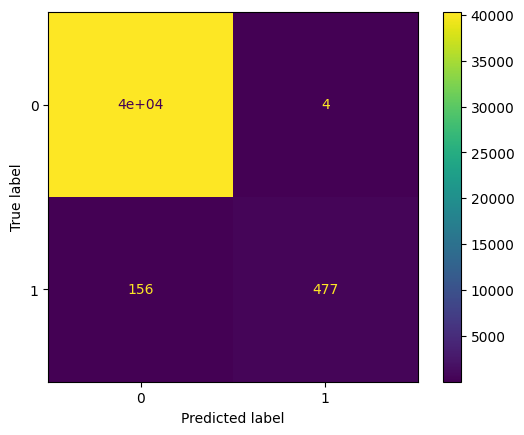

In [35]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(best_model,xtest,ytest)

In [36]:
ypred_train=best_model.predict(xtrain)
ypred_test=best_model.predict(xtest)

In [37]:
ypred_train[0:5]

array([0, 0, 0, 0, 0], dtype=int64)

In [38]:
ypred_test[0:5]

array([1, 0, 0, 0, 0], dtype=int64)

In [39]:
from sklearn.metrics import classification_report
print(classification_report(ytest,ypred_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     40296
           1       0.99      0.75      0.86       633

    accuracy                           1.00     40929
   macro avg       0.99      0.88      0.93     40929
weighted avg       1.00      1.00      1.00     40929



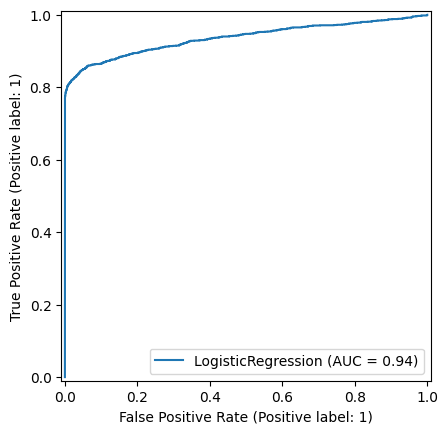

In [41]:
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_estimator(best_model,xtrain,ytrain)

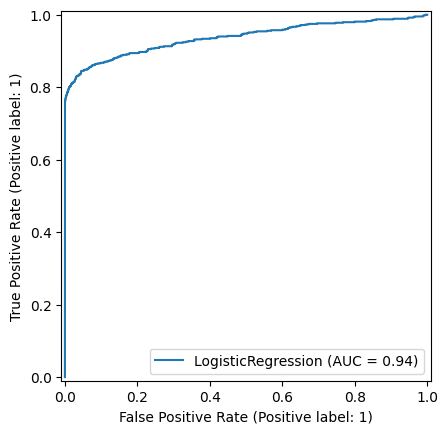

In [42]:
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_estimator(best_model,xtest,ytest)

In [43]:
roc_score=cross_val_score(best_model,xtrain,ytrain,cv=5,scoring='roc_auc')
roc_score

array([0.92898514, 0.95206094, 0.94561382, 0.92778182, 0.92747201])

In [44]:
roc_score.mean()

0.9363827455789149

out of sample prediction

In [45]:
xnew=pd.read_csv('test.csv')
xnew.head()


,id,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],TWF,HDF,PWF,OSF,RNF
0,136429,L50896,L,302.3,311.5,1499,38.0,60,0,0,0,0,0
1,136430,L53866,L,301.7,311.0,1713,28.8,17,0,0,0,0,0
2,136431,L50498,L,301.3,310.4,1525,37.7,96,0,0,0,0,0
3,136432,M21232,M,300.1,309.6,1479,47.6,5,0,0,0,0,0
4,136433,M19751,M,303.4,312.3,1515,41.3,114,0,0,0,0,0


In [46]:
pre

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('impute', SimpleImputer()),
                                                 ('scaler', StandardScaler())]),
                                 ['Air temperature [K]',
                                  'Process temperature [K]',
                                  'Rotational speed [rpm]', 'Torque [Nm]',
                                  'Tool wear [min]', 'TWF', 'HDF', 'PWF', 'OSF',
                                  'RNF'])])

In [48]:
xnew_pre=pre.transform(xnew)
xnew_pre.head()

,num__Air temperature [K],num__Process temperature [K],num__Rotational speed [rpm],num__Torque [Nm],num__Tool wear [min],num__TWF,num__HDF,num__PWF,num__OSF,num__RNF
0,1.308759,1.125444,-0.153753,-0.276240,-0.694271,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568
1,0.986567,0.764477,1.388744,-1.358313,-1.366516,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568
2,0.771772,0.331317,0.033653,-0.311525,-0.131461,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568
3,0.127386,-0.246230,-0.297912,0.852880,-1.554119,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568
4,1.899446,1.702992,-0.038426,0.111895,0.149943,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568


In [49]:
xnew_pre.shape

(90954, 10)

In [52]:
pred=best_model.predict(xnew_pre)
prob=best_model.predict_proba(xnew_pre)

In [53]:
pred[0:5]

array([0, 0, 0, 0, 0], dtype=int64)

In [59]:
model.classes_

array([0, 1], dtype=int64)

In [60]:
prob[0:5]

array([[0.99807151, 0.00192849],
       [0.99898697, 0.00101303],
       [0.9976368 , 0.0023632 ],
       [0.99620332, 0.00379668],
       [0.99545728, 0.00454272]])

In [62]:
prob_sur=prob[:,1]
prob_sur[0:5]

array([0.00192849, 0.00101303, 0.0023632 , 0.00379668, 0.00454272])

In [65]:
df_final=xnew[['id']]
df_final.head()

,id
0,136429
1,136430
2,136431
3,136432
4,136433


In [66]:
df_final['Machine Failure']=pred
df_final['prob']=prob_sur

In [68]:
df_final.head()

,id,Machine Failure,prob
0,136429,0,0.001928
1,136430,0,0.001013
2,136431,0,0.002363
3,136432,0,0.003797
4,136433,0,0.004543


In [69]:
df_final['Machine Failure'].value_counts()

Machine Failure
0    89848
1     1106
Name: count, dtype: int64

In [70]:
df_final.to_csv('prediction.csv',index=False)